In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

control,machine_target='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'

In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-013022":
    fig_casename='ms_gzCOBALT'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-013022 ms_gzCOBALT


In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022


In [6]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1968-1972'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension


In [7]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [8]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [9]:
tmpdir = '/work/Jessica.Luo/tmp/'+control
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1993-1997'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(path_root, control, machine_target, 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

#print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321


In [10]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [11]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [12]:
import string
alphabet=list(string.ascii_lowercase)

## Figure - NPP Comparison

In [13]:
grid

<xarray.Dataset>
Dimensions:       (xh: 720, xq: 720, yh: 576, yq: 576)
Coordinates:
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
Data variables: (12/26)
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    deptho        (yh, xh) float32 ...
    ...            ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
Attributes:
    external_variables:  areacello areacello

In [48]:
pp = ds.intpp.mean(dim='time') * 12 * seconds_per_day * 1000
c_pp = dc.intpp.mean(dim='time')* 12 * seconds_per_day * 1000
# units of mg C m-2 d-1

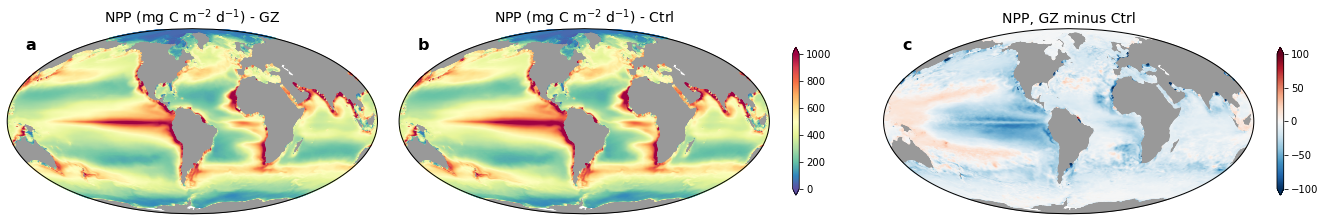

In [49]:
fig=plt.figure(figsize=(24,8))
gs=gridspec.GridSpec(2,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}


# NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=pp, transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap='Spectral_r')
ax[i].set_title('NPP (mg C m$^{-2}$ d$^{-1}$) - GZ', fontsize=14)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_pp, transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap='Spectral_r')
ax[i].set_title('NPP (mg C m$^{-2}$ d$^{-1}$) - Ctrl', fontsize=14)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(pp - c_pp), transform=ccrs.PlateCarree(), vmin=-100, vmax=100, cmap='RdBu_r')
ax[i].set_title('NPP, GZ minus Ctrl', fontsize=14)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()

## Figure - Compare zooplankton and export fluxes with control

In [50]:
frac_smz_pp=(ds.jprod_nsmz_100.mean(dim='time') * 6.625 / ds.intpp.mean(dim='time'))
frac_mesoz_pp=(ds.jprod_nmdz_100.mean(dim='time') + ds.jprod_nlgz_100.mean(dim='time')) * 6.625 / ds.intpp.mean(dim='time')
frac_tun_pp=(ds.jprod_nsmt_100.mean(dim='time') + ds.jprod_nlgt_100.mean(dim='time')) * 6.625 / ds.intpp.mean(dim='time')
frac_bact_pp=(ds.jprod_nbact_100.mean(dim='time') * 6.625) / ds.intpp.mean(dim='time')

pe_ratio = ds.fndet_100.mean(dim='time') * 6.625 / ds.intpp.mean(dim='time')

In [51]:
c_frac_smz_pp=(dc.jprod_nsmz_100.mean(dim='time') * 6.625 / dc.intpp.mean(dim='time'))
c_frac_mesoz_pp=(dc.jprod_nmdz_100.mean(dim='time') + dc.jprod_nlgz_100.mean(dim='time')) * 6.625 / ds.intpp.mean(dim='time')
c_frac_tun_pp=(dc.jprod_nsmt_100.mean(dim='time') + dc.jprod_nlgt_100.mean(dim='time')) * 6.625/ ds.intpp.mean(dim='time')
c_frac_bact_pp=(dc.jprod_nbact_100.mean(dim='time') * 6.625) / dc.intpp.mean(dim='time')

c_pe_ratio = dc.fndet_100.mean(dim='time') * 6.625 / dc.intpp.mean(dim='time')

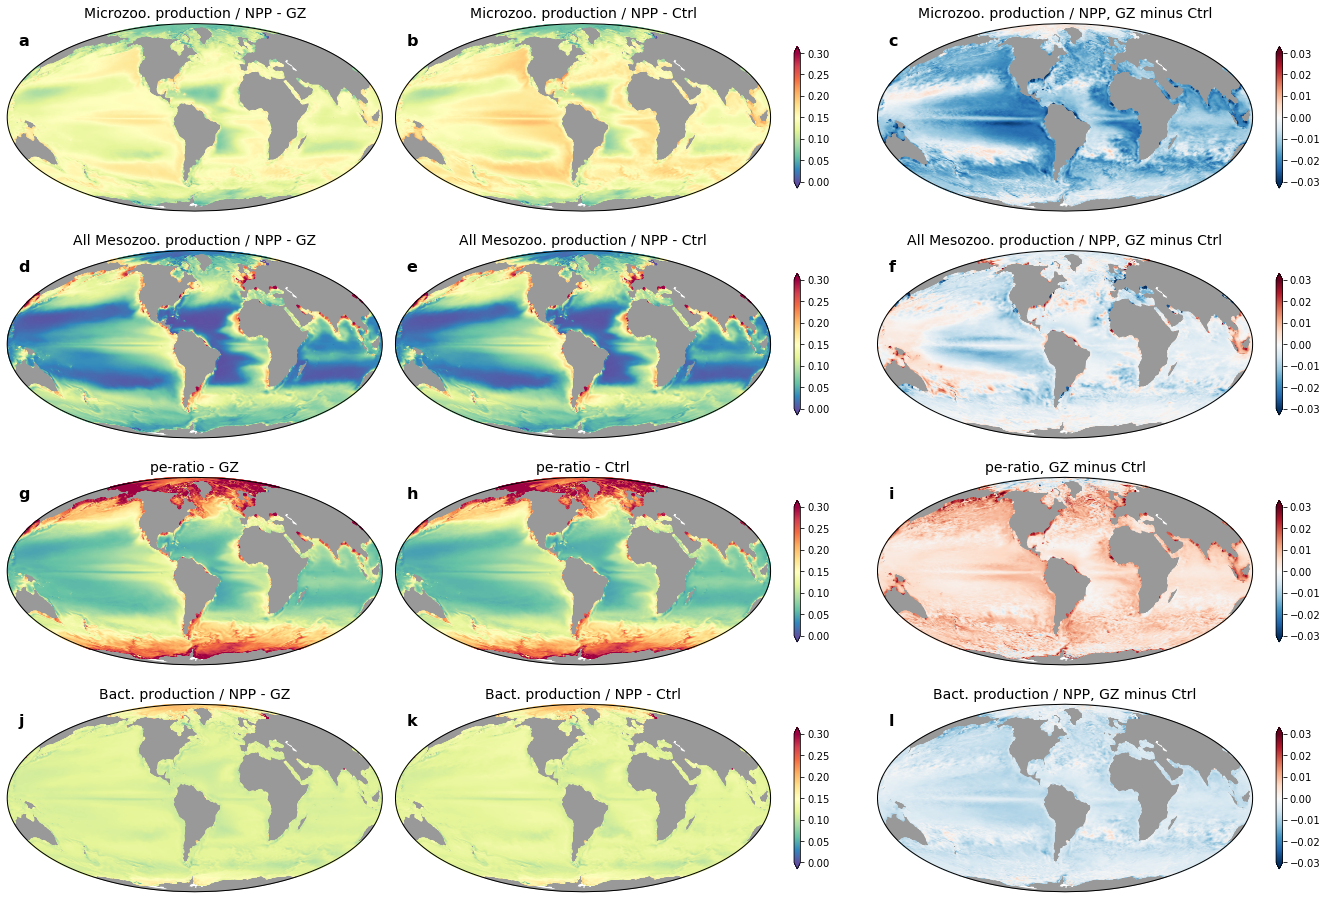

In [63]:
fig=plt.figure(figsize=(24,16))
gs=gridspec.GridSpec(4,3, wspace=0.03, width_ratios=[1,1.25,1.25])

ax={};cs={}

# microzoo/NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_smz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Microzoo. production / NPP - GZ', fontsize=14)

ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_smz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Microzoo. production / NPP - Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_smz_pp - c_frac_smz_pp), transform=ccrs.PlateCarree(), vmin=-0.03,vmax=0.03, cmap='RdBu_r')
ax[i].set_title('Microzoo. production / NPP, GZ minus Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# mesozoo/NPP
i=3
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_mesoz_pp+frac_tun_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('All Mesozoo. production / NPP - GZ', fontsize=14)

ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=4
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_mesoz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('All Mesozoo. production / NPP - Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=5
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_mesoz_pp+frac_tun_pp - c_frac_mesoz_pp), transform=ccrs.PlateCarree(), vmin=-0.03,vmax=0.03, cmap='RdBu_r')
ax[i].set_title('All Mesozoo. production / NPP, GZ minus Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# PE-ratio
i=6
ax[i] = plt.subplot(gs[2,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=pe_ratio, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('pe-ratio - GZ', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=7
ax[i] = plt.subplot(gs[2,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_pe_ratio, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('pe-ratio - Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=8
ax[i] = plt.subplot(gs[2,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(pe_ratio - c_pe_ratio), transform=ccrs.PlateCarree(), vmin=-0.03,vmax=0.03, cmap='RdBu_r')
ax[i].set_title('pe-ratio, GZ minus Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# bact-ratio
i=9
ax[i] = plt.subplot(gs[3,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_bact_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Bact. production / NPP - GZ', fontsize=14)

ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=10
ax[i] = plt.subplot(gs[3,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_bact_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Bact. production / NPP - Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=11
ax[i] = plt.subplot(gs[3,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_bact_pp - c_frac_bact_pp), transform=ccrs.PlateCarree(), vmin=-0.03,vmax=0.03, cmap='RdBu_r')
ax[i].set_title('Bact. production / NPP, GZ minus Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')
plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_ProductionRatios.png', dpi=300, bbox_inches='tight')

# Supplemental Figure

In [53]:
frac_mdz_pp=ds.jprod_nmdz_100.mean(dim='time') * 6.625 / ds.intpp.mean(dim='time')
frac_lgz_pp=ds.jprod_nlgz_100.mean(dim='time') * 6.625 / ds.intpp.mean(dim='time')

c_frac_mdz_pp=dc.jprod_nmdz_100.mean(dim='time') * 6.625 / dc.intpp.mean(dim='time')
c_frac_lgz_pp=dc.jprod_nlgz_100.mean(dim='time') * 6.625 / dc.intpp.mean(dim='time')


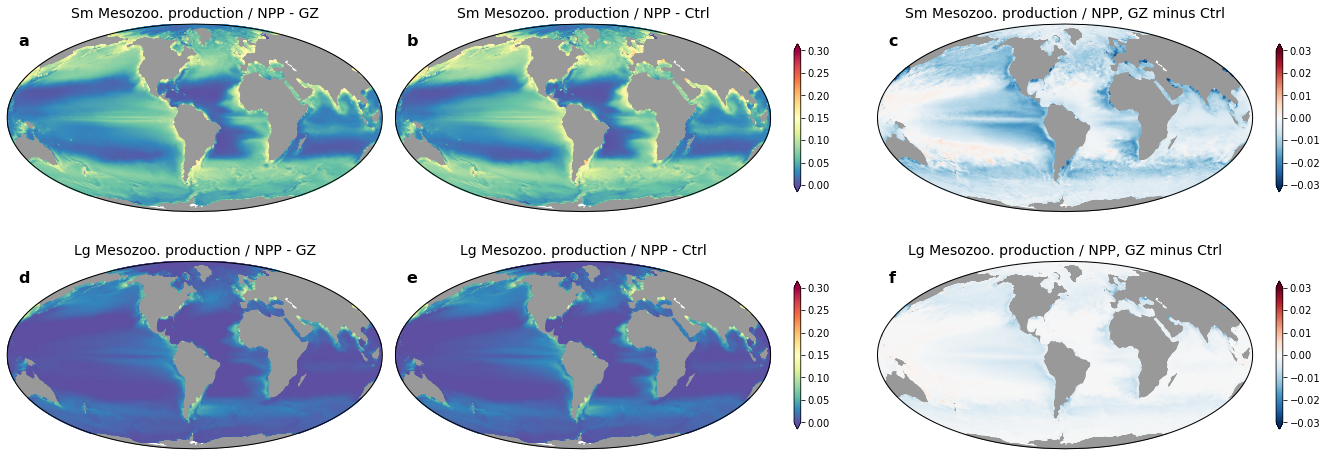

In [64]:
fig=plt.figure(figsize=(24,8))
gs=gridspec.GridSpec(2,3, wspace=0.03, width_ratios=[1,1.25,1.25])

ax={};cs={}

# mdz/NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_mdz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Sm Mesozoo. production / NPP - GZ', fontsize=14)

ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_mdz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Sm Mesozoo. production / NPP - Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_mdz_pp - c_frac_mdz_pp), transform=ccrs.PlateCarree(), vmin=-0.03,vmax=0.03, cmap='RdBu_r')
ax[i].set_title('Sm Mesozoo. production / NPP, GZ minus Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# mesozoo/NPP
i=3
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_lgz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Lg Mesozoo. production / NPP - GZ', fontsize=14)

ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=4
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_lgz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.3, cmap='Spectral_r')
ax[i].set_title('Lg Mesozoo. production / NPP - Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=5
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_lgz_pp - c_frac_lgz_pp), transform=ccrs.PlateCarree(), vmin=-0.03,vmax=0.03, cmap='RdBu_r')
ax[i].set_title('Lg Mesozoo. production / NPP, GZ minus Ctrl', fontsize=14)
ax[i].text(0.03, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_MesoZooProductionRatios_Supp.png', dpi=300, bbox_inches='tight')

In [65]:
val = ((frac_bact_pp * grid.areacello).sum() - (c_frac_bact_pp * grid.areacello).sum()) / (c_frac_bact_pp * grid.areacello).sum()
print('bact prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_smz_pp * grid.areacello).sum() - (c_frac_smz_pp * grid.areacello).sum()) / (c_frac_smz_pp * grid.areacello).sum()
print('small zooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_mdz_pp * grid.areacello).sum() - (c_frac_mdz_pp * grid.areacello).sum()) / (c_frac_mdz_pp * grid.areacello).sum()
print('medium zooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_lgz_pp * grid.areacello).sum() - (c_frac_lgz_pp * grid.areacello).sum()) / (c_frac_lgz_pp * grid.areacello).sum()
print('large zooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_mesoz_pp * grid.areacello).sum() - (c_frac_mesoz_pp * grid.areacello).sum()) / (c_frac_mesoz_pp * grid.areacello).sum()
print('mesozooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((pe_ratio * grid.areacello).sum() - (c_pe_ratio * grid.areacello).sum()) / (c_pe_ratio * grid.areacello).sum()
print('pe-ratio difference: ' + str(np.round(val.values*100,1)) + ' %')



bact prod / NPP difference: -4.1 %
small zooplankton prod / NPP difference: -7.8 %
medium zooplankton prod / NPP difference: -10.9 %
large zooplankton prod / NPP difference: -11.5 %
mesozooplankton prod / NPP difference: -13.8 %
pe-ratio difference: 4.7 %


In [66]:
val = ((ds.jprod_nbact_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nbact_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('bacteria prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')


val = ((ds.jprod_nsmz_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nsmz_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('small zooplankton prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')


val = ((ds.jprod_nmdz_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nmdz_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('medium zooplankton prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')


val = ((ds.jprod_nlgz_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nlgz_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('large zooplankton prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')

bacteria prod difference: -0.5 Pg C y-1
small zooplankton prod difference: -0.97 Pg C y-1
medium zooplankton prod difference: -0.52 Pg C y-1
large zooplankton prod difference: -0.14 Pg C y-1


In [67]:
val = ((ds.nsmz_100.mean(dim='time') * grid.areacello).sum() - (dc.nsmz_100.mean(dim='time') * grid.areacello).sum()) / (dc.nsmz_100.mean(dim='time') * grid.areacello).sum()
print('small zooplankton biomass difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((ds.nmdz_100.mean(dim='time') * grid.areacello).sum() - (dc.nmdz_100.mean(dim='time') * grid.areacello).sum()) / (dc.nmdz_100.mean(dim='time') * grid.areacello).sum()
print('medium zooplankton biomass difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((ds.nlgz_100.mean(dim='time') * grid.areacello).sum() - (dc.nlgz_100.mean(dim='time') * grid.areacello).sum()) / (dc.nlgz_100.mean(dim='time') * grid.areacello).sum()
print('large zooplankton biomass difference: ' + str(np.round(val.values*100,1)) + ' %')

small zooplankton biomass difference: -7.0 %
medium zooplankton biomass difference: -6.0 %
large zooplankton biomass difference: -7.2 %


## Loss to HTL

In [68]:
hp_ingestion = (ds.jhploss_nmdz_100 + ds.jhploss_nlgz_100 + ds.jhploss_nsmt_100 + ds.jhploss_nlgz_100).mean(dim='time') * cobalt_n_2_c * 12.011 * seconds_per_year

c_hp_ingestion = (dc.jhploss_nmdz_100 + dc.jhploss_nlgz_100 + dc.jhploss_nsmt_100 + dc.jhploss_nlgz_100).mean(dim='time') * cobalt_n_2_c * 12.011 * seconds_per_year
# units in g C m-2 y-1

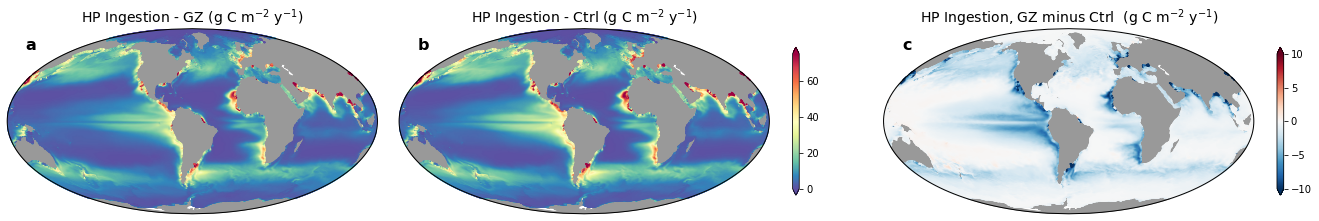

In [69]:
fig=plt.figure(figsize=(24,8))
gs=gridspec.GridSpec(2,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}


# HP ingestion
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=hp_ingestion, transform=ccrs.PlateCarree(), vmin=0, vmax=75, cmap='Spectral_r')
ax[i].set_title('HP Ingestion - GZ (g C m$^{-2}$ y$^{-1}$)', fontsize=14)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_hp_ingestion, transform=ccrs.PlateCarree(), vmin=0, vmax=75, cmap='Spectral_r')
ax[i].set_title('HP Ingestion - Ctrl (g C m$^{-2}$ y$^{-1}$)', fontsize=14)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(hp_ingestion - c_hp_ingestion), transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap='RdBu_r')
ax[i].set_title('HP Ingestion, GZ minus Ctrl  (g C m$^{-2}$ y$^{-1}$)', fontsize=14)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()

In [70]:
hp_ingestion = (ds.jhploss_nlgz_100 + ds.jhploss_nlgz_100).mean(dim='time') * cobalt_n_2_c * 12.011 * seconds_per_year

c_hp_ingestion = (dc.jhploss_nlgz_100 + dc.jhploss_nlgz_100).mean(dim='time') * cobalt_n_2_c * 12.011 * seconds_per_year
# units in g C m-2 y-1

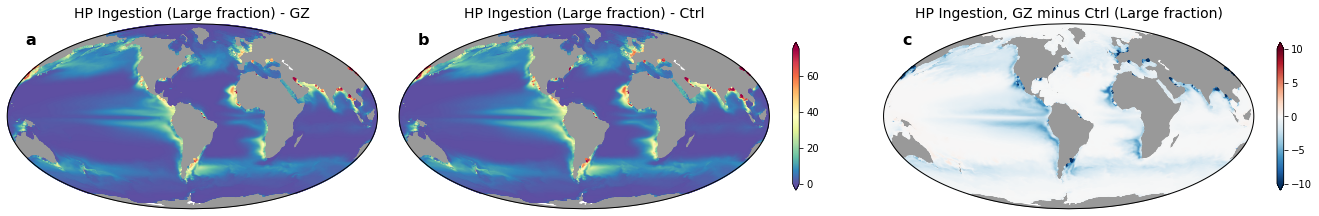

In [71]:
fig=plt.figure(figsize=(24,8))
gs=gridspec.GridSpec(2,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}


# HP ingestion
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=hp_ingestion, transform=ccrs.PlateCarree(), vmin=0, vmax=75, cmap='Spectral_r')
ax[i].set_title('HP Ingestion (Large fraction) - GZ', fontsize=14)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_hp_ingestion, transform=ccrs.PlateCarree(), vmin=0, vmax=75, cmap='Spectral_r')
ax[i].set_title('HP Ingestion (Large fraction) - Ctrl', fontsize=14)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(hp_ingestion - c_hp_ingestion), transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap='RdBu_r')
ax[i].set_title('HP Ingestion, GZ minus Ctrl (Large fraction)', fontsize=14)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()

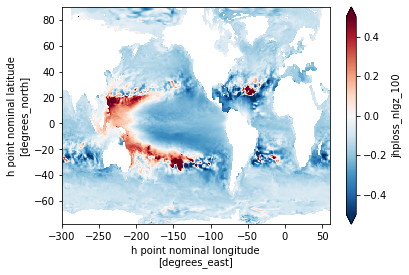

In [72]:
((hp_ingestion - c_hp_ingestion)/c_hp_ingestion).plot(vmin=-.5,vmax=.5, cmap='RdBu_r')